# Unit 12—Tales from the Crypto

![Imange](https://utoronto.bootcampcontent.com/utoronto-bootcamp/utor-tor-fin-pt-11-2020-u-c/-/raw/master/Homework/12-NLP/Instructions/Images/sentimental.jpeg)

## Sentiment Analysis

### Initial Imports

In [1]:
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi.newsapi_client import NewsApiClient
load_dotenv
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/alibhatti/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
analyzer = SentimentIntensityAnalyzer()

### Api key environment

In [3]:
# getenv function wasnt getiing the api key, so i have to force it manually
api_key= "61c6cf424fc44938876cf79b54e24f36"

### newsapi client

In [4]:
newsapi= NewsApiClient(api_key=api_key)

### Bitcoin news articles

In [5]:
bitcoin= newsapi.get_everything(q="bitcoin",language="en",sort_by="relevancy")

### Ethereum news articles

In [6]:
ethereum= newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy")

### Bitcoin sentiment scores DataFrame

In [7]:
bitcoin_sentiments = []

for article in bitcoin["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

In [8]:
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
cols = ["compound", "negative", "neutral", "positive", "text", "date"]
bitcoin_df = bitcoin_df[cols]

### Bitcoin Sentiment

In [9]:
bitcoin_df.describe()

,compound,negative,neutral,positive
count,18.000000,18.000000,18.000000,18.000000
mean,0.249478,0.008444,0.868889,0.067111
std,0.341023,0.024663,0.227516,0.071077
min,-0.361200,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.856250,0.000000
50%,0.140300,0.000000,0.917500,0.055500
75%,0.559650,0.000000,0.989500,0.110000
max,0.831600,0.082000,1.000000,0.246000


### Ethereum sentiment scores DataFrame

In [10]:
ethereum_sentiments = []

for article in ethereum["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

In [11]:
ethereum_df = pd.DataFrame(ethereum_sentiments)
cols = ["compound", "negative", "neutral", "positive", "text", "date"]
ethereum_df = ethereum_df[cols]

### Ethereum Sentiment

In [12]:
ethereum_df.describe()

,compound,negative,neutral,positive
count,91.000000,91.000000,91.000000,91.000000
mean,0.170367,0.030253,0.902363,0.067363
std,0.398973,0.057382,0.080818,0.065751
min,-0.910000,0.000000,0.667000,0.000000
25%,0.000000,0.000000,0.854000,0.000000
50%,0.140600,0.000000,0.909000,0.063000
75%,0.492750,0.060000,0.969000,0.099000
max,0.877900,0.299000,1.000000,0.256000


### Questions:
- Which coin had the highest mean positive score?
ETHEREUM
- Which coin had the highest compound score?
ETHEREUM
- Which coin had the highest positive score?
ETHEREUM

## Natural Language Processing

## Tokenizer

#### Intial Imports

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alibhatti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/alibhatti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
lemmatizer= WordNetLemmatizer()

#### Tokenizer Function

In [15]:
def tokenizer(text):
    sw=set(stopwords.words("english"))
    regex= re.compile('[^a-zA-Z]')
    re_clean= regex.sub(" ",text)
    words=word_tokenize(re_clean)
    output= [word.lower()for word in words if word.lower() not in sw]
    return output

#### Bitcoin Tokenization

In [16]:
bitcoin_df["tokens"]= bitcoin_df["text"].apply(tokenizer)
bitcoin_df.head()

,compound,negative,neutral,positive,text,date,tokens
0,0.6369,0.000,0.887,0.113,Some things are best left a mystery at least a...,2021-02-26T00:40:52Z,"[things, best, left, mystery, least, far, coin..."
1,0.0000,0.000,0.000,0.000,,2021-03-03T19:10:57Z,[]
2,0.7041,0.000,0.860,0.140,"Bitcoin is the future, again: this morning, it...",2021-02-16T17:45:00Z,"[bitcoin, future, morning, hit, time, high, va..."
3,0.1779,0.000,0.955,0.045,"Miamis mayor, Francis Suarez, is champing at t...",2021-02-12T18:00:00Z,"[miamis, mayor, francis, suarez, champing, bit..."
4,-0.1280,0.082,0.852,0.066,Jack Dorsey and Jay Z create a bitcoin endowme...,2021-02-12T23:10:51Z,"[jack, dorsey, jay, z, create, bitcoin, endowm..."


#### Ethereum Tokenization

In [17]:
ethereum_df["tokens"]= ethereum_df["text"].apply(tokenizer)
ethereum_df.head()

,compound,negative,neutral,positive,text,date,tokens
0,-0.3400,0.119,0.818,0.063,Worried that the GeForce RTX 3060 will be sold...,2021-02-18T16:16:57Z,"[worried, geforce, rtx, sold, cryptocurrency, ..."
1,-0.4588,0.145,0.789,0.066,NFTs are the latest cryptocurrency rage these ...,2021-03-06T14:00:00Z,"[nfts, latest, cryptocurrency, rage, days, ban..."
2,0.4404,0.000,0.909,0.091,NFTs (non-fungible tokens) — or scarce digital...,2021-02-27T13:26:25Z,"[nfts, non, fungible, tokens, scarce, digital,..."
3,0.0258,0.000,0.970,0.030,While the first Christie's auction of digital ...,2021-02-20T11:48:30Z,"[first, christie, auction, digital, artwork, b..."
4,0.7096,0.000,0.856,0.144,Attempting to get ahead of cryptocurrency mine...,2021-02-18T17:46:00Z,"[attempting, get, ahead, cryptocurrency, miner..."


## NGrams and Frequency Analysis

#### Initial Imports

In [18]:
from collections import Counter
from nltk import ngrams
import matplotlib.pyplot as plt

#### Concating Text and Tokenization

In [19]:
bitcoin_text= ' '.join(bitcoin_df.text)

In [20]:
bitcoin_processed= tokenizer(bitcoin_text)

#### Bitcoin N-grams

In [21]:
bitgram= Counter(ngrams(bitcoin_processed,n=2))

In [22]:
print(dict(bitgram.most_common(10)))

{('chars', 'reuters'): 4, ('reuters', 'staff'): 4, ('cryptocurrency', 'exchange'): 2, ('time', 'high'): 2, ('friday', 'chars'): 2, ('investment', 'giveaway'): 2, ('staff', 'file'): 2, ('file', 'photo'): 2, ('virtual', 'currency'): 2, ('illustration', 'taken'): 2}


#### Ethereum N-grams

In [23]:
ethereum_text= ' '.join(ethereum_df.text)
ethereum_processed= tokenizer(ethereum_text)
egram= Counter(ngrams(ethereum_processed,n=2))
print(dict(egram.most_common(10)))

{('chars', 'reuters'): 11, ('reuters', 'staff'): 11, ('file', 'photo'): 11, ('reuters', 'bitcoin'): 8, ('record', 'high'): 7, ('new', 'york'): 6, ('staff', 'file'): 6, ('non', 'fungible'): 5, ('chars', 'ethereum'): 5, ('virtual', 'currency'): 5}


#### Function token_count

In [24]:
def token_count(tokens, N=10):
    return Counter(tokens).most_common(N)

In [25]:
token_count(bitcoin_processed)

[('chars', 17),
 ('bitcoin', 12),
 ('reuters', 10),
 ('cryptocurrency', 7),
 ('staff', 4),
 ('illustration', 4),
 ('exchange', 3),
 ('morning', 3),
 ('time', 3),
 ('high', 3)]

In [26]:
token_count(ethereum_processed)

[('chars', 91),
 ('bitcoin', 40),
 ('reuters', 37),
 ('cryptocurrency', 25),
 ('new', 25),
 ('ethereum', 17),
 ('high', 15),
 ('record', 13),
 ('nvidia', 12),
 ('photo', 12)]

##  Bitcoin Word Cloud

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

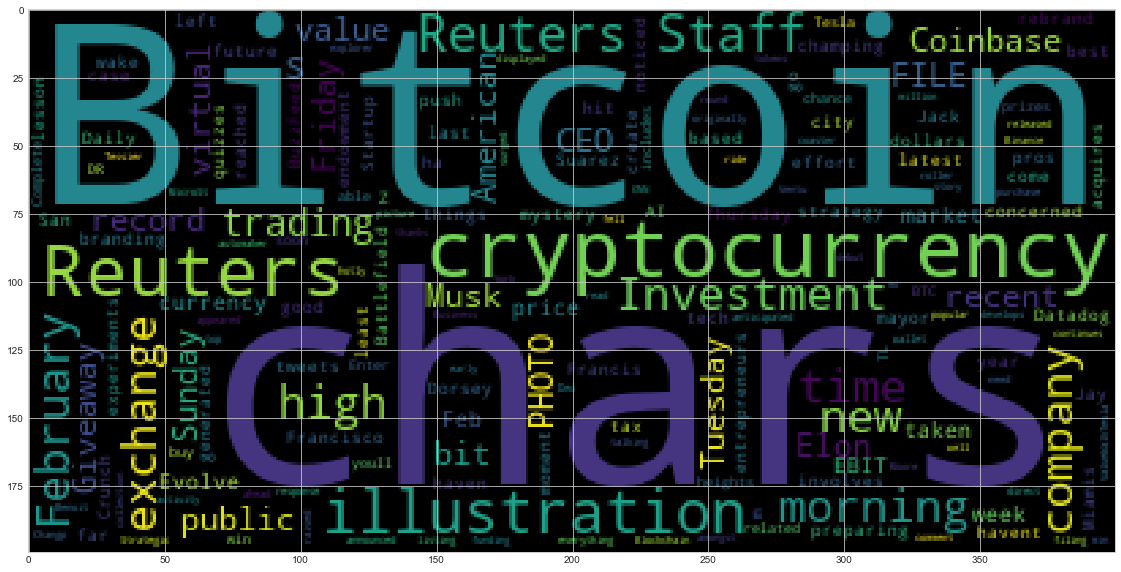

In [28]:
bitcloud= WordCloud().generate(bitcoin_text)
plt.imshow(bitcloud)

## Ethereum Word Cloud

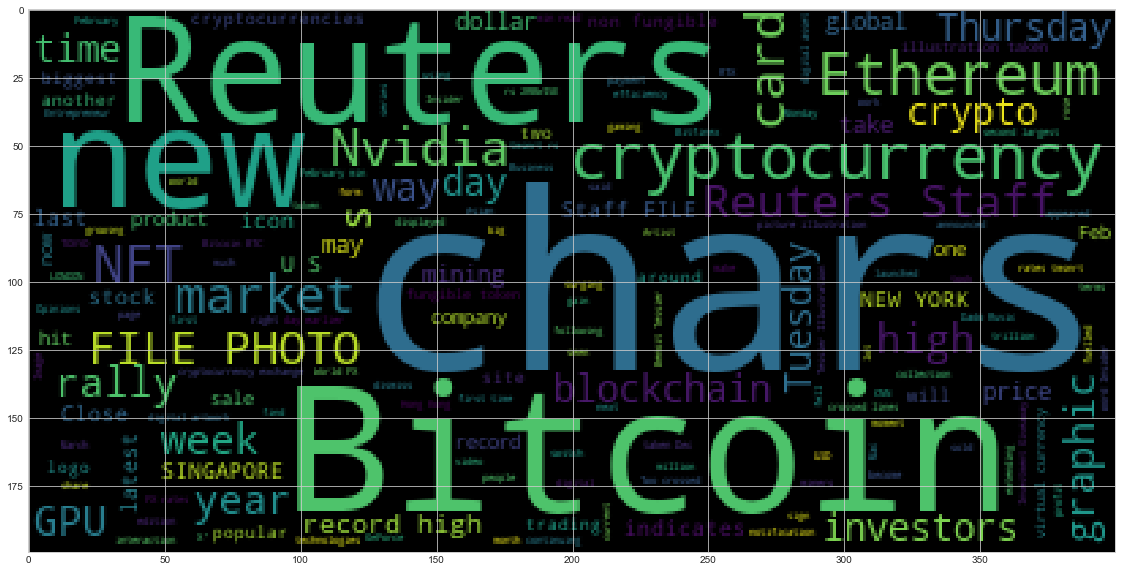

In [29]:
ecloud= WordCloud().generate(ethereum_text)
plt.imshow(ecloud)

## Named Entity Recognition

In [30]:
import spacy
from spacy import displacy


In [34]:
nlp= spacy.load("en_core_web_sm")

### Bitcion Ner Analysis

In [35]:
bitcoin_text

'Some things are best left a mystery at least as far as Coinbase is concerned.\xa0\r\nThe San Francisco-based cryptocurrency exchange has been preparing to go public since last year, and in a Thursday pros… [+1953 chars]  Bitcoin is the future, again: this morning, it hit an all-time high value of over $50,000. Is there a lesson in here? Are Elon Musks tweets a good investment strategy? Should we get in on this? We ha… [+3198 chars] Miamis mayor, Francis Suarez, is champing at the bit to rebrand his city as a haven for tech entrepreneurs and the tax dollars that come in their wake. His latest branding effort involves a push to m… [+2454 chars] Jack Dorsey and Jay Z create a bitcoin endowment, Datadog acquires a Startup Battlefield company and BuzzFeed experiments with AI-generated quizzes. This is your Daily Crunch for February 12, 2021.\r\n… [+2805 chars] In case you havent noticed, Bitcoins having a bit of a moment. The cryptocurrencys value reached record heights in recent weeks, yo

In [36]:
doc=nlp(bitcoin_text)

In [38]:
doc.user_data["title"] = "Bitcoin"

In [39]:
displacy.render(doc,style="ent")

In [40]:
for ent in doc.ents:
    print(ent.text,"-",ent.label_,spacy.explain(ent.label_))

Coinbase - NORP Nationalities or religious or political groups
San Francisco - GPE Countries, cities, states
last year - DATE Absolute or relative dates or periods
Thursday - DATE Absolute or relative dates or periods
this morning - TIME Times smaller than a day
over $50,000 - MONEY Monetary values, including unit
Francis Suarez - PERSON People, including fictional
Jack Dorsey - PERSON People, including fictional
Jay Z - PERSON People, including fictional
Datadog - ORG Companies, agencies, institutions, etc.
Startup Battlefield - ORG Companies, agencies, institutions, etc.
BuzzFeed - ORG Companies, agencies, institutions, etc.
AI - ORG Companies, agencies, institutions, etc.
Daily Crunch - WORK_OF_ART Titles of books, songs, etc.
February 12, 2021 - DATE Absolute or relative dates or periods
Bitcoins - PERSON People, including fictional
recent weeks - DATE Absolute or relative dates or periods
Friday - DATE Absolute or relative dates or periods
over $12,000 - MONEY Monetary values, inc

### Ethereum Ner Analysis

In [41]:
ethereum_text

'Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. … [+1652 chars] NFTs are the latest cryptocurrency rage these days, with bands like Kings of Leon releasing their next album as limited edition "golden tickets," and NBA digital collectibles being sold for millions … [+7287 chars] NFTs (non-fungible tokens) — or scarce digital content represented as tokens — are driving a new wave of crypto adoption.\r\nThanks to the Ethereum blockchain, artists, gaming companies and content cre… [+5365 chars] While the first Christie\'s auction of digital artwork backed by NFT (non-fungible token) is still a few days away, one of the most notable sales in that world has already taken place. Chris Torres cr… [+1064 chars] Attempting to get ahead of cryptocurrency miners who might snatch up a good chunk of RTX 3060 stock when the GPU goes on sale next week,

In [42]:
edoc=nlp(ethereum_text)

In [43]:
edoc.user_data["title"] = "Ethereum"
displacy.render(edoc,style="ent")

In [44]:
for ent in edoc.ents:
    print(ent.text,"-",ent.label_,spacy.explain(ent.label_))

GeForce - ORG Companies, agencies, institutions, etc.
3060 - GPE Countries, cities, states
GPU - ORG Companies, agencies, institutions, etc.
these days - DATE Absolute or relative dates or periods
Kings - PERSON People, including fictional
NBA - ORG Companies, agencies, institutions, etc.
millions - CARDINAL Numerals that do not fall under another type
Ethereum - ORG Companies, agencies, institutions, etc.
first - ORDINAL "first", "second", etc.
Christie's - ORG Companies, agencies, institutions, etc.
NFT - ORG Companies, agencies, institutions, etc.
a few days - DATE Absolute or relative dates or periods
Chris Torres - PERSON People, including fictional
3060 - DATE Absolute or relative dates or periods
GPU - ORG Companies, agencies, institutions, etc.
next week - DATE Absolute or relative dates or periods
Nvidia - PERSON People, including fictional
this morning - TIME Times smaller than a day
NEW YORK - GPE Countries, cities, states
Reuters - ORG Companies, agencies, institutions, etc